<Axes: title={'center': 'Position (m) Run #12 vs Time (s) Run #12'}, xlabel='Time (s) Run #12'>

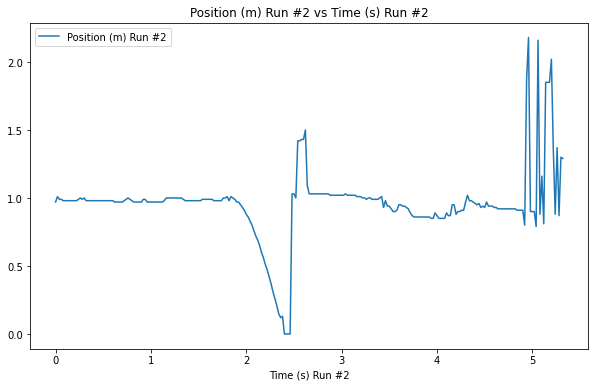

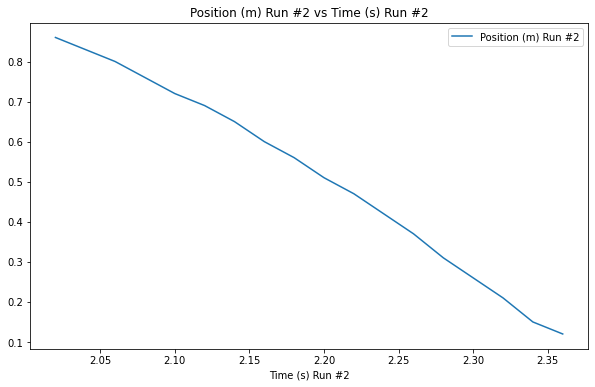

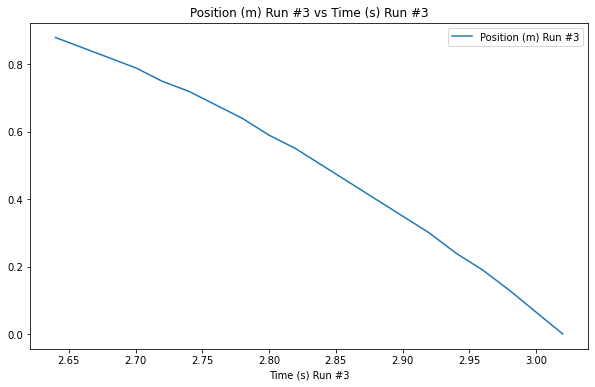

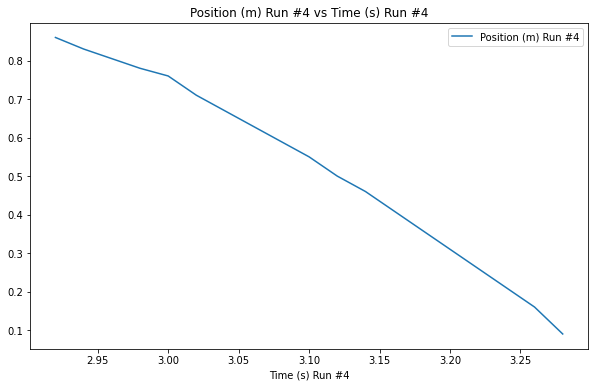

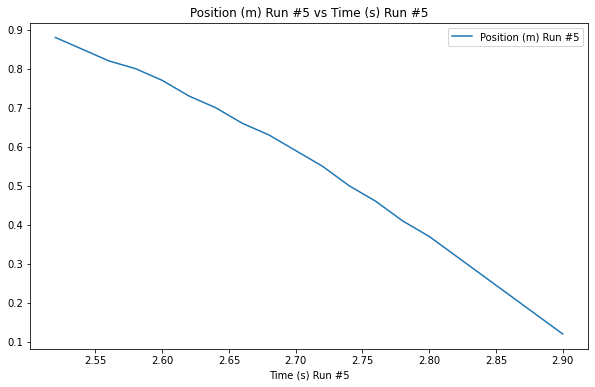

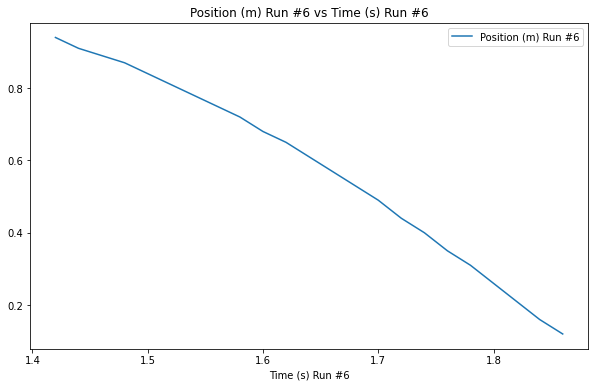

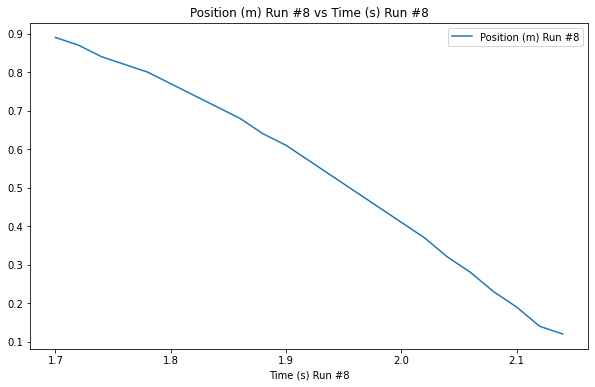

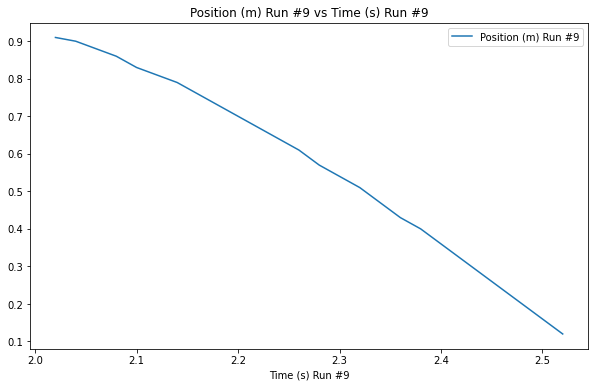

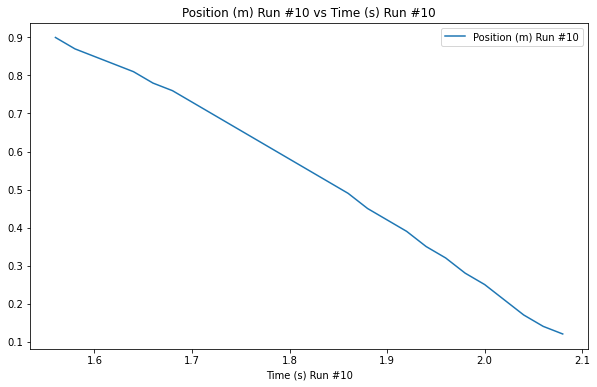

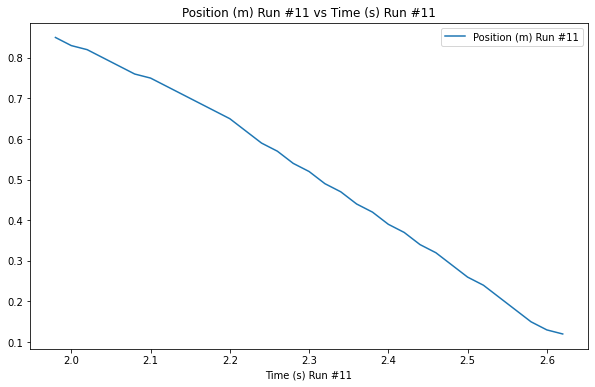

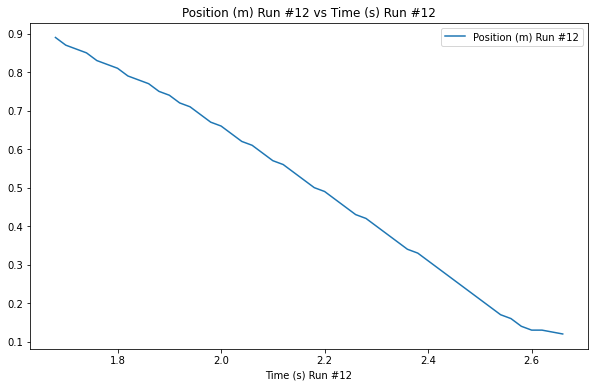

In [140]:
import pandas as pd

df = pd.read_csv('data_for_coffee.csv')
copy_df = df.copy()

columns = df.columns
num_runs = len(columns) // 4

for i in range(1, len(columns), 4):
    position_col = columns[i]
    
    # cut at end code
    zero_index = df[df[position_col] <= 0.12].index.min()
    if pd.notna(zero_index):
        copy_df[position_col] = copy_df[position_col].iloc[:zero_index+1]



    # cut at start code
    values = df[position_col].values
    for j in range(len(values) - 4):
        window = values[j:j+5]
        if all(window[k] > window[k+1] for k in range(len(window)-1)):
            copy_df[position_col] = copy_df[position_col].iloc[j+5:]
            break


    #resulting data, just get rid of deviations
    values = copy_df[position_col].values
    for j in range(len(values) - 1):
        if values[j] <= values[j+1]:
            mean_value = (values[j] + values[j+2]) / 2
            copy_df[position_col].iloc[j+1] = mean_value


copy_df.to_csv('cleaned.csv', index=False)
df.plot(x=columns[0], y=columns[1], kind='line', figsize=(10, 6), title=f'{columns[1]} vs {columns[0]}')
copy_df.plot(x=columns[0], y=columns[1], kind='line', figsize=(10, 6), title=f'{columns[1]} vs {columns[0]}')
copy_df.plot(x=columns[4], y=columns[5], kind='line', figsize=(10, 6), title=f'{columns[5]} vs {columns[4]}')
copy_df.plot(x=columns[8], y=columns[9], kind='line', figsize=(10, 6), title=f'{columns[9]} vs {columns[8]}')
copy_df.plot(x=columns[12], y=columns[13], kind='line', figsize=(10, 6), title=f'{columns[13]} vs {columns[12]}')
copy_df.plot(x=columns[16], y=columns[17], kind='line', figsize=(10, 6), title=f'{columns[17]} vs {columns[16]}')
copy_df.plot(x=columns[20], y=columns[21], kind='line', figsize=(10, 6), title=f'{columns[21]} vs {columns[20]}')
copy_df.plot(x=columns[24], y=columns[25], kind='line', figsize=(10, 6), title=f'{columns[25]} vs {columns[24]}')
copy_df.plot(x=columns[28], y=columns[29], kind='line', figsize=(10, 6), title=f'{columns[29]} vs {columns[28]}')
copy_df.plot(x=columns[32], y=columns[33], kind='line', figsize=(10, 6), title=f'{columns[33]} vs {columns[32]}')
copy_df.plot(x=columns[36], y=columns[37], kind='line', figsize=(10, 6), title=f'{columns[37]} vs {columns[36]}')

